Saving image4.jpeg to image4 (2).jpeg
Image uploaded: image4 (2).jpeg

Which operation of the following would you like to perform on the image? 
1. Image Quantization
2. Spatial Resolution Reduction
Enter your choice (1/2): 2
Enter reduction factor (e.g., 2, 4, 8): 3


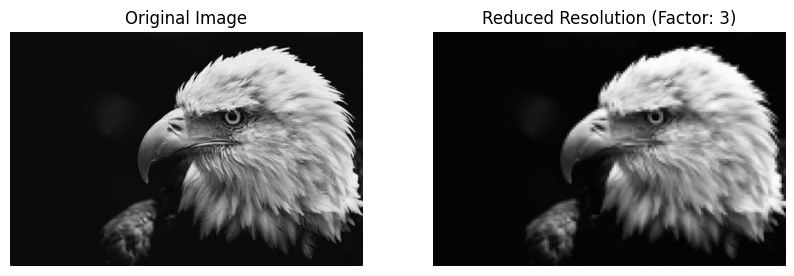

Execution Time: 0.136952 seconds


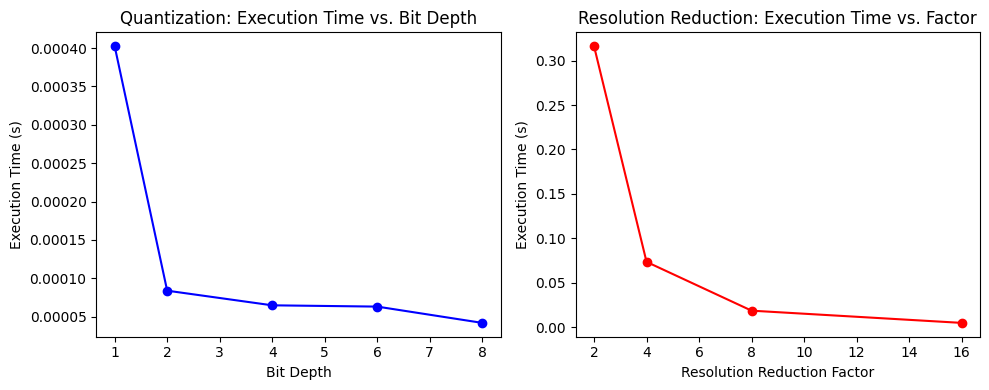

In [14]:
#importing the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from google.colab import files

#Defining a function to upload an image in Google Colab
def uploading_image():
    uploaded_img = files.upload()  # Prompt user to upload an image
    img = list(uploaded_img.keys())[0]  # Get the uploaded file name
    print(f"Image uploaded: {img}")
    return img

# Part 1: Image Quantization
def image_quantization(img, depth):
    if depth < 1 or depth > 8:
        raise ValueError("Bit depth must be between 1 and 8.")

    start_time = time.time()  # Start measuring execution time
    levels = 2 ** depth
    img_quantized = (img // (256 // levels)) * (256 // levels)
    end_time = time.time()  # End measuring execution time

    execution_time = end_time - start_time
    return img_quantized.astype(np.uint8), execution_time

# Part 2: Spatial Resolution Modification
def resolution(img, factor):
    if factor < 1:
        raise ValueError("Reduction factor must be at least 1.")

    h, w = img.shape  # Get image dimensions
    new_height, new_width = h // factor, w // factor
    reduced_img = np.zeros((new_height, new_width), dtype=np.uint8)

    start_time = time.time()  # Start measuring execution time
    for i in range(new_height):
        for j in range(new_width):
            block = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor]
            reduced_img[i, j] = np.mean(block).astype(np.uint8)
    end_time = time.time()  # End measuring execution time

    execution_time = end_time - start_time
    return reduced_img, execution_time

#Defining a function to display results
def results(original, processed, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

#Defining a function for Performance Analysis (Execution Time vs. Parameter Values)
def performance(img):
    depths = [1, 2, 4, 6, 8]
    factors = [2, 4, 8, 16]

    quant_times = []
    res_times = []

    for depth in depths:
        _, exec_time = image_quantization(img, depth)
        quant_times.append(exec_time)

    for factor in factors:
        _, exec_time = resolution(img, factor)
        res_times.append(exec_time)

    # Plot Execution Time vs Bit Depth
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(depths, quant_times, marker='o', linestyle='-', color='b')
    plt.xlabel("Bit Depth")
    plt.ylabel("Execution Time (s)")
    plt.title("Quantization: Execution Time vs. Bit Depth")

    # Plot Execution Time vs Resolution Reduction Factor
    plt.subplot(1, 2, 2)
    plt.plot(factors, res_times, marker='o', linestyle='-', color='r')
    plt.xlabel("Resolution Reduction Factor")
    plt.ylabel("Execution Time (s)")
    plt.title("Resolution Reduction: Execution Time vs. Factor")

    plt.tight_layout()
    plt.show()

def main():
    image_path = uploading_image()
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Error: The image could not be read. Ensure it's a valid grayscale image.")
        return

    print("\nWhich operation of the following would you like to perform on the image? ")
    print("1. Image Quantization")
    print("2. Spatial Resolution Reduction")
    choice = input("Enter your choice (1/2): ").strip()

    if choice == "1":
        depth = int(input("Enter target bit depth (1-8): ").strip())
        quantized_img, exec_time = image_quantization(img, depth)
        results(img, quantized_img, f"Quantized (Bit Depth: {depth})")
        print(f"Execution Time: {exec_time:.6f} seconds")

    elif choice == "2":
        factor = int(input("Enter reduction factor (e.g., 2, 4, 8): ").strip())
        reduced_img, exec_time = resolution(img, factor)
        results(img, reduced_img, f"Reduced Resolution (Factor: {factor})")
        print(f"Execution Time: {exec_time:.6f} seconds")
    else:
        print("Invalid choice. Please enter 1, 2, or 3.")

    performance(img)

if __name__ == "__main__":
    main()
